In [1]:
import sys
import numpy as np
import cv2
import sklearn.metrics as sklm

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# from keras import backend as K
# img_dim_ordering = 'tf'
# K.set_image_dim_ordering(img_dim_ordering)


In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import to_categorical

### 1. 데이터 불러오기

In [4]:
# loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

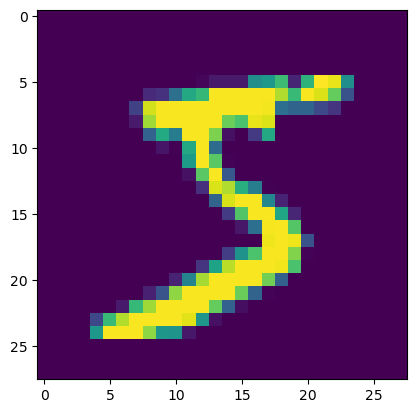

In [5]:
plt.imshow(x_train[0])

### 2. 데이터 사이즈 조정

In [6]:
x_train2 = []

# converting it to RGB 합성곱 신경망에서는 (가로, 세로, 차원) 의 3개의 shape으로 input이 들어가야함
for i in x_train: 
    # (28,28) -> (32,32,3)
    eachImg = cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR)
    eachImg = np.reshape(eachImg, ((1,) + eachImg.shape))
    x_train2.append(eachImg)

In [7]:
# 1,32,32,3 -> 60000,32,32,3으로 변경
x_train2 = np.concatenate(x_train2).astype('float32')

In [8]:
x_test2 = []

# converting it to RGB 합성곱 신경망에서는 (가로, 세로, 차원) 의 3개의 shape으로 input이 들어가야함
for i in x_test: 
    # (28,28) -> (32,32,3)
    eachImg = cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR)
    eachImg = np.reshape(eachImg, ((1,) + eachImg.shape))
    x_test2.append(eachImg)

In [9]:
# 1,32,32,3 -> 60000,32,32,3으로 변경
x_test2 = np.concatenate(x_test2).astype('float32')

In [10]:
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

### 3. 모델 생성

In [11]:
img_shape = x_train2.shape[1:]
img_shape

(32, 32, 3)

In [12]:
num_classes = len(set(y_train))
num_classes

10

In [13]:
layer_type="relu"
layer_type

'relu'

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [15]:
vgg_model = VGG16(weights=None, include_top=False)

In [16]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [17]:
# 커스텀 input_shape 생성
keras_input = Input(shape=img_shape, name = 'custom_input')
keras_input.shape
# 커스텀모델 생성 
vgg_model_c = vgg_model(inputs=keras_input)

# Fully Connected Layer 추가 생성 
x = Flatten(name='flatten')(vgg_model_c)
x = Dense(64, activation="relu", name='custom_1')(x)
x = Dense(64, activation="relu", name='custom_2')(x)
x = Dense(num_classes, activation='softmax', name='prediction')(x)

# 커스텀 모델 생성
pretrained_model = Model(inputs=keras_input, outputs=x)
pretrained_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 custom_1 (Dense)            (None, 64)                32832     
                                                                 
 custom_2 (Dense)            (None, 64)                4160      
                                                                 
 prediction (Dense)          (None, 10)                650       
                                                                 
Total params: 14,752,330
Trainable params: 14,752,330
Non-tra

In [18]:
# 커스텀 모델 생성
pretrained_model = Model(inputs=keras_input, outputs=x)
pretrained_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 custom_1 (Dense)            (None, 64)                32832     
                                                                 
 custom_2 (Dense)            (None, 64)                4160      
                                                                 
 prediction (Dense)          (None, 10)                650       
                                                                 
Total params: 14,752,330
Trainable params: 14,752,330
Non-t

In [19]:
# 커스탐모델 생성 
test_model = pretrained_model(keras_input)
test_model

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'model_1')>

In [20]:
# Fully Connected Layer 추가 생성 
x = Flatten(name='flatten')(test_model)
x = Dense(64, activation="relu", name='custom_1')(x)
x = Dense(64, activation="relu", name='custom_2')(x)
x = Dense(num_classes, activation='softmax', name='prediction')(x)

In [21]:
# 커스텀 모델 생성
pretrained_model = Model(inputs=keras_input, outputs=x)

In [22]:
pretrained_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 model_1 (Functional)        (None, 10)                14752330  
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 custom_1 (Dense)            (None, 64)                704       
                                                                 
 custom_2 (Dense)            (None, 64)                4160      
                                                                 
 prediction (Dense)          (None, 10)                650       
                                                                 
Total params: 14,757,844
Trainable params: 14,757,844
Non-t

### 4. 모델 컴파일

In [23]:
pretrained_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### 5. 모델 훈련

In [24]:
pretrained_model.fit(x_train2, 
                     y_train_one, 
                     epochs = 2, 
                     validation_data=(x_test2, y_test_one), verbose=1)

Epoch 1/2
1875/1875 [==============================] - 262s 133ms/step - loss: 2.3022 - accuracy: 0.1109 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/2
1875/1875 [==============================] - 238s 127ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1135


In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()